In [1]:
import mysql.connector
import pandas as pd
import sys
sys.path.append('..')
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector

In [2]:
# Database connection details
host = 'localhost'
user = 'danicoco'
password = 'password'
database = 'legodb'

In [3]:
# Connect to the database
connection = connect_to_database(host, user, password, database)

In [4]:
# Queries
queries = {
    "num_sets_per_theme": """
        SELECT themes.name AS Theme, COUNT(*) AS "Number of sets"
        FROM themes
        LEFT JOIN sets ON themes.id = sets.theme_id
        GROUP BY themes.name
        ORDER BY COUNT(*) DESC
        LIMIT 10;
    """,
    "top_sets_with_most_parts": """
        SELECT DISTINCT name, num_parts
        FROM sets
        ORDER BY num_parts DESC
        LIMIT 10;
    """,
    "top_sets_with_least_parts": """
        SELECT name, num_parts
        FROM sets
        WHERE num_parts >= 1
        ORDER BY num_parts ASC
        LIMIT 10;
    """,
    "themes_with_most_parts": """
        SELECT themes.name AS Theme, SUM(num_parts) AS "Total amount of parts for the theme"
        FROM themes
        LEFT JOIN sets ON themes.id = sets.theme_id
        GROUP BY themes.name
        ORDER BY SUM(num_parts) DESC
        LIMIT 10;
    """,
    "quantity_of_pieces_in_oldest_sets": """
        SELECT DISTINCT name, year, num_parts
        FROM sets
        WHERE year = (SELECT MIN(year) FROM sets)
        ORDER BY num_parts DESC
        LIMIT 10;
    """,
    "changes_in_quantity_of_pieces": """
        SELECT year, FLOOR(AVG(num_parts)) AS avg_num_parts
        FROM sets
        GROUP BY year
        ORDER BY year ASC;
    """
}

### Create dataframes and visualizations for each hypothesis

In [5]:
df_num_sets_per_theme = query_to_dataframe(connection, queries['num_sets_per_theme'])
df_num_sets_per_theme

,Theme,Number of sets
0,Supplemental,904
1,Technic,666
2,City,572
3,Friends,519
4,Basic Set,505
5,Creator,493
6,Gear,477
7,Service Packs,435
8,Duplo,430
9,Construction,378


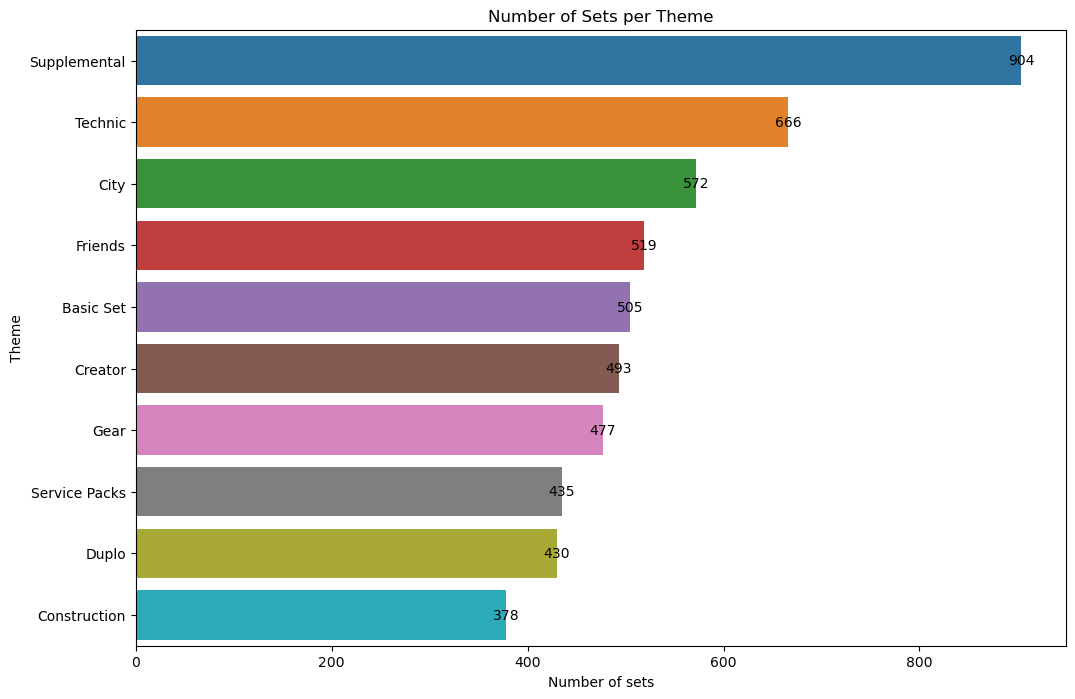

In [6]:
visualize_num_sets_per_theme(df_num_sets_per_theme)

In [7]:
df_top_sets_with_most_parts = query_to_dataframe(connection, queries['top_sets_with_most_parts'])
df_top_sets_with_most_parts

,name,num_parts
0,Taj Mahal,5922
1,Star Wars / M&M Mosaic - Promo Set,5461
2,Window Exploration Bag,5200
3,Millennium Falcon - UCS,5195
4,Firehouse Headquarters,4640
5,Personalised Mosaic Portrait,4501
6,Tower Bridge,4295
7,Big Ben,4166
8,The Disney Castle,4060
9,Death Star,4023


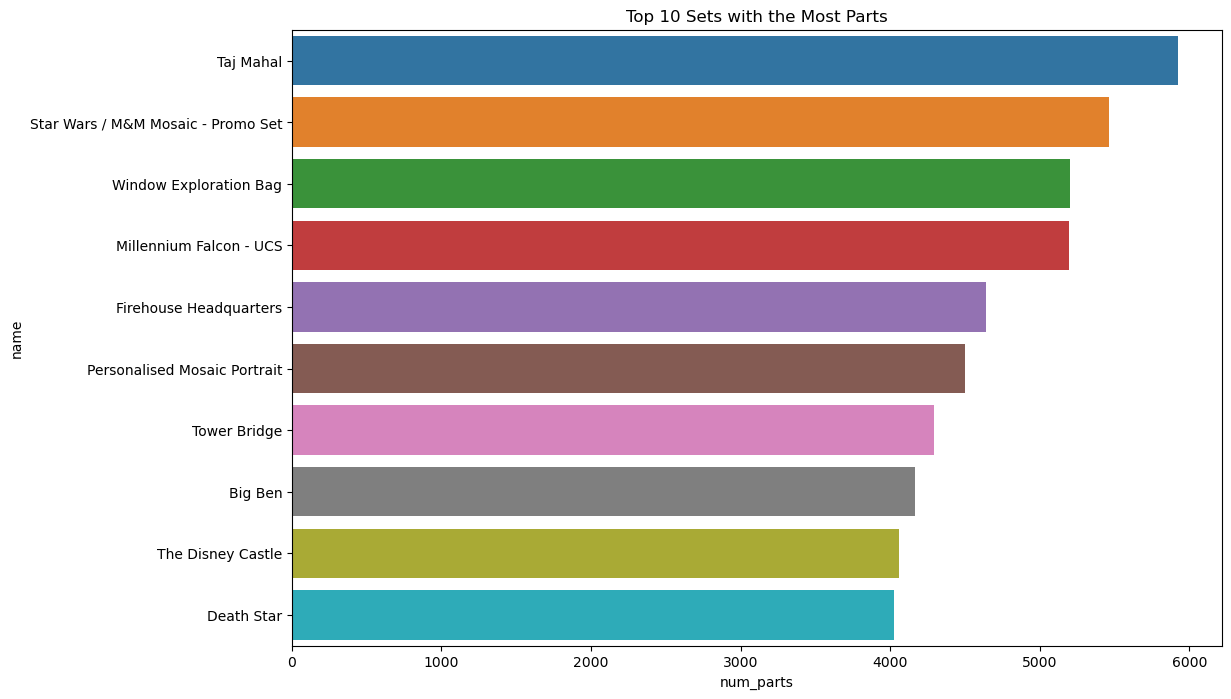

In [8]:
visualize_top_sets_with_most_parts(df_top_sets_with_most_parts)


In [9]:
df_top_sets_with_least_parts = query_to_dataframe(connection, queries['top_sets_with_least_parts'])
df_top_sets_with_least_parts

,name,num_parts
0,Train Connection Wire,1
1,Compass Sensor for Mindstorms NXT,1
2,Green Baseplate,1
3,4.5V Battery Case,1
4,Replacement 4.5V Motor,1
5,Intelligent NXT Brick (Black),1
6,4.5V Battery Case,1
7,Single Disk Pack,1
8,Sand Baseplate,1
9,2x2 Electrical Plate,1


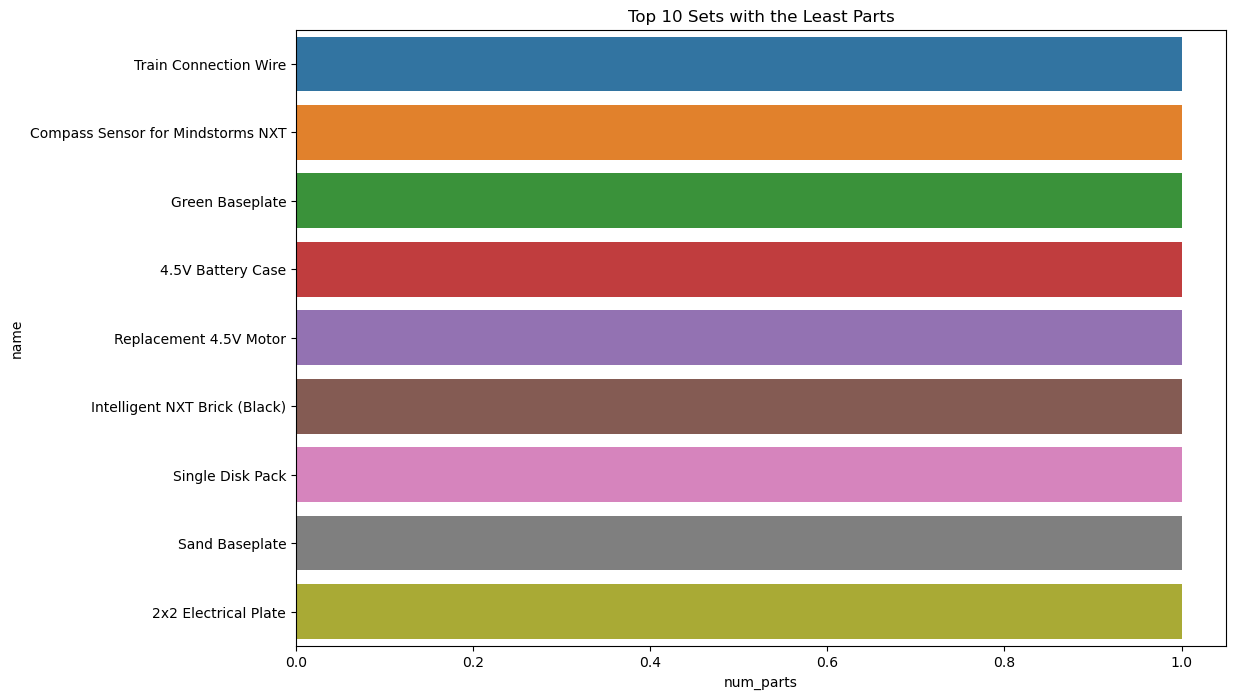

In [10]:
visualize_top_sets_with_least_parts(df_top_sets_with_least_parts)


In [11]:
df_themes_with_most_parts = query_to_dataframe(connection, queries['themes_with_most_parts'])
df_themes_with_most_parts

,Theme,Total amount of parts for the theme
0,Basic Set,199262
1,Star Wars Episode 4/5/6,166978
2,Construction,99943
3,Creator,90793
4,Technic,88527
5,Sculptures,78963
6,Traffic,77685
7,Ninjago,74767
8,Friends,69814
9,Star Wars,68111


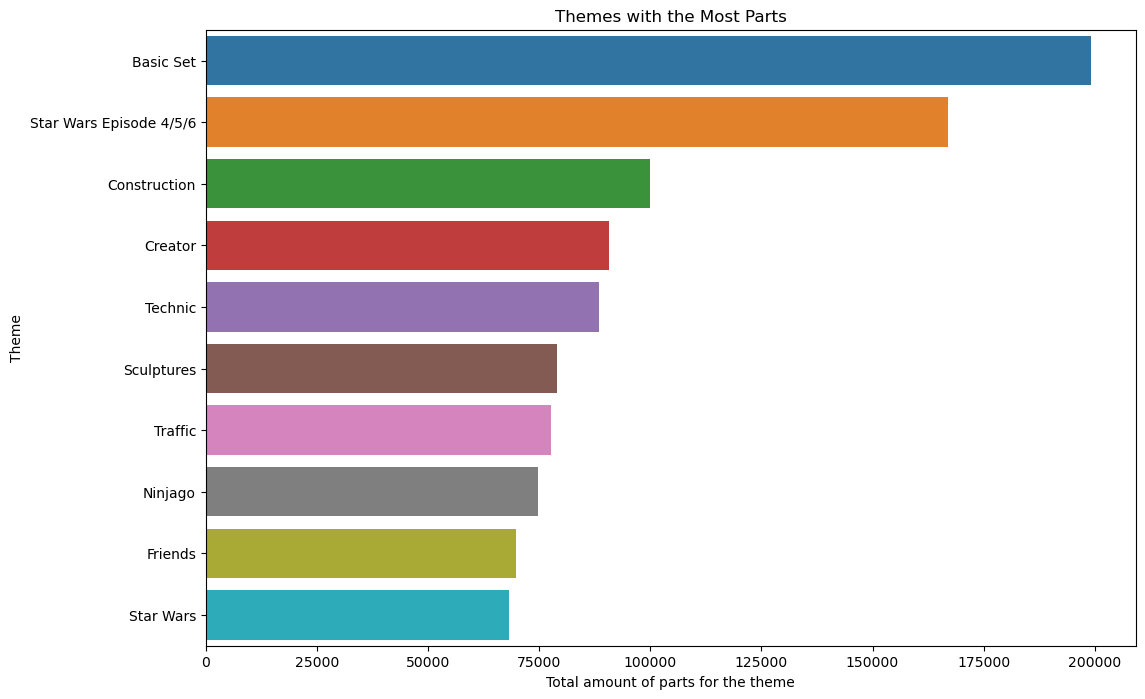

In [12]:
visualize_themes_with_most_parts(df_themes_with_most_parts)

In [13]:
df_quantity_of_pieces_in_oldest_sets = query_to_dataframe(connection, queries['quantity_of_pieces_in_oldest_sets'])
df_quantity_of_pieces_in_oldest_sets

,name,year,num_parts
0,Automatic Binding Bricks Small Brick Set (Lego...,1950,24
1,Individual 2 x 4 Bricks,1950,10
2,Individual 2 x 2 Bricks,1950,9
3,Individual 1 x 2 x 2 Window (without glass),1950,7
4,Individual 1 x 2 x 3 Window (without glass),1950,7
5,Individual 1 x 2 x 4 Door (without glass),1950,7
6,Individual 1 x 4 x 2 Window (without glass),1950,7


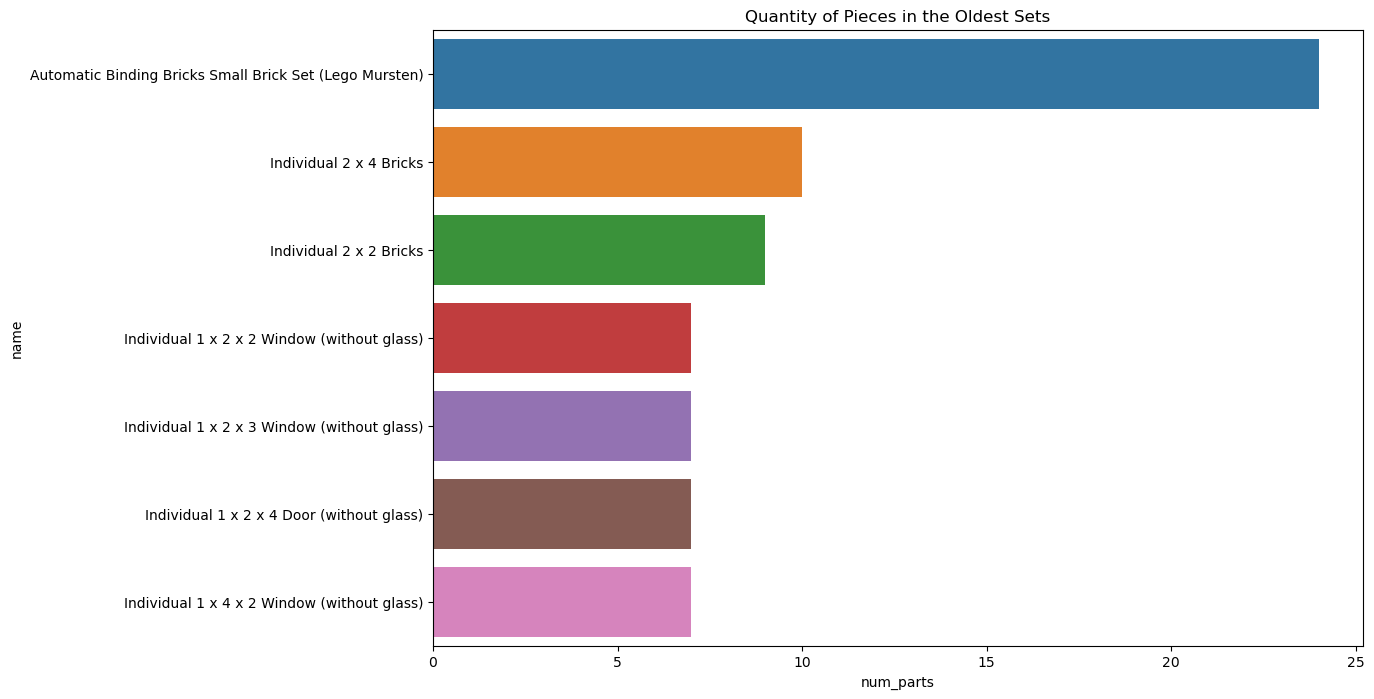

In [14]:
visualize_quantity_of_pieces_in_oldest_sets(df_quantity_of_pieces_in_oldest_sets)


In [15]:
df_changes_in_quantity_of_pieces = query_to_dataframe(connection, queries['changes_in_quantity_of_pieces'])
df_changes_in_quantity_of_pieces

,year,avg_num_parts
0,1950,10
1,1953,16
2,1954,12
3,1955,37
4,1956,19
...,...,...
61,2013,183
62,2014,172
63,2015,208
64,2016,264


/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


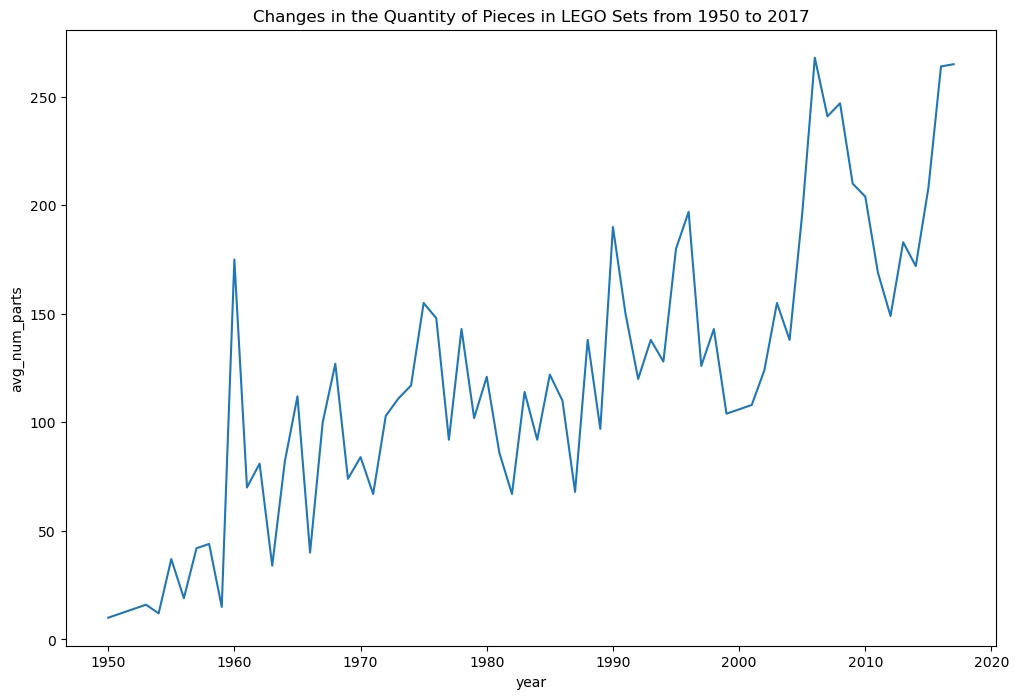

In [16]:
visualize_changes_in_quantity_of_pieces(df_changes_in_quantity_of_pieces)
